#To build a fraud detection system using machine learning, we will follow a structured approach, covering Data Exploration, Feature Engineering, Model Selection, Performance Evaluation, and Financial Impact Analysis. Let's break down the tasks step by step and implement them in Python.
#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, randint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, precision_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

#Load the Data

In [3]:
# Load the dataset
file_path = r"C:\Users\PAVITHRA\Downloads\Fraud_Analysis_Dataset.xlsx"
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

df = pd.DataFrame(df)

#Explore the Data

In [5]:
# Show the first few rows of the dataset
print(df.head())

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  


In [7]:
# Check the summary statistics and data types
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


#Data Exploration and Visualization #Perform Exploratory Data Analysis (EDA) to better understand the data.

In [11]:
# Step 1: Calculate Skewness of each numerical column
numerical_columns = df.select_dtypes(include=[np.number]).columns
skew_values = df[numerical_columns].apply(lambda x: skew(x.dropna()))

# Print skewness values
print("Skewness of Numerical Columns:")
print(skew_values)

Skewness of Numerical Columns:
step              3.584373
amount            8.391111
oldbalanceOrg     2.836823
newbalanceOrig    2.909925
oldbalanceDest    4.124960
newbalanceDest    3.680703
isFraud           2.621215
dtype: float64


#Visualize the distribution of fraudulent vs non-fraudulent transactions 

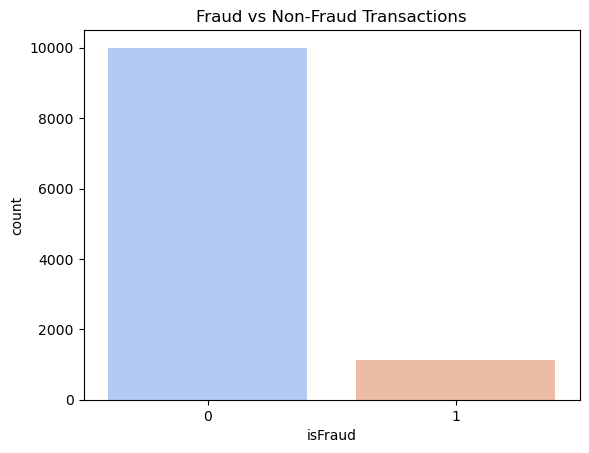

In [13]:
# Visualize the distribution of fraudulent vs non-fraudulent transactions
sns.countplot(x='isFraud', data=df, palette='coolwarm')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

#Analyze the distribution of Numeric Features: We will now explore numeric features like amount and balanceOrig, which may have different distributions for fraudulent vs non-fraudulent transactions.

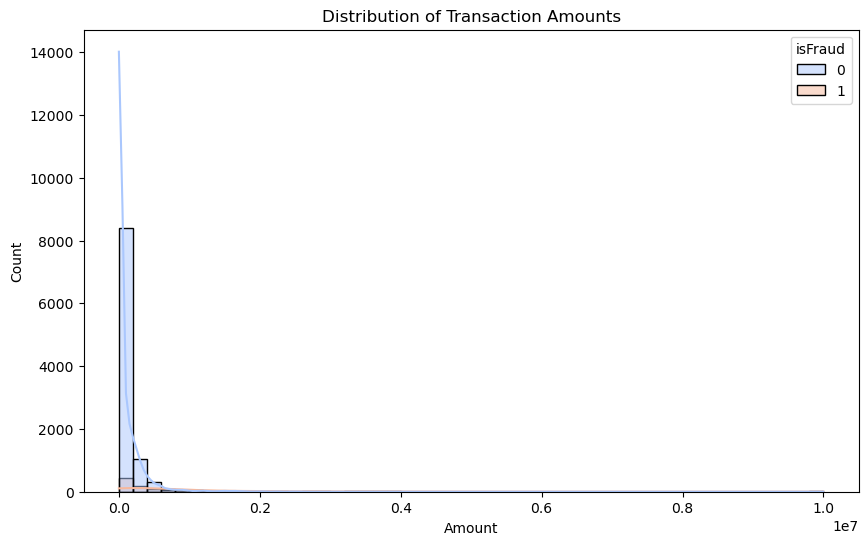

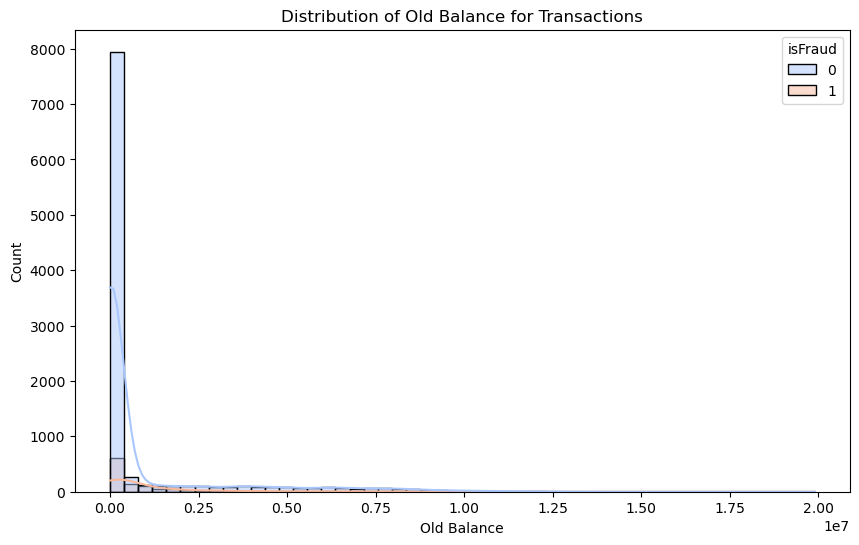

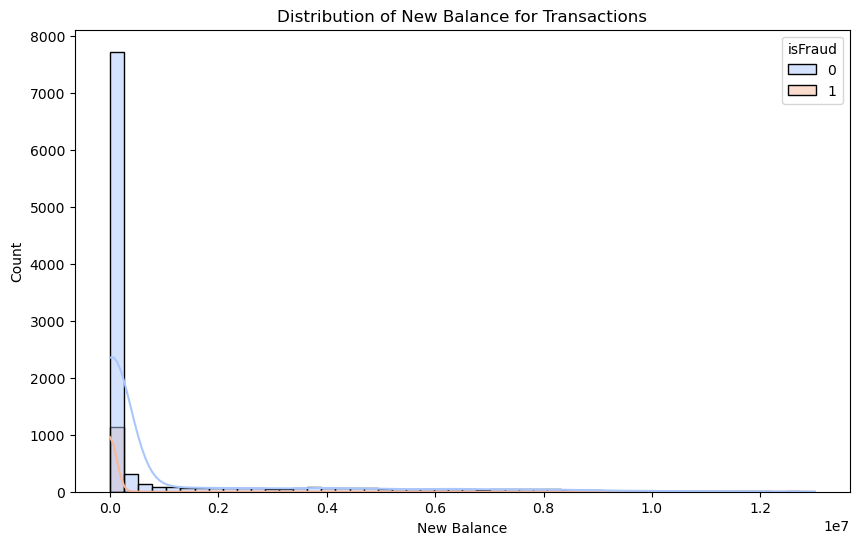

In [15]:
# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amount', hue='isFraud', kde=True, palette='coolwarm', bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of balance changes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='oldbalanceOrg', hue='isFraud', kde=True, palette='coolwarm', bins=50)
plt.title('Distribution of Old Balance for Transactions')
plt.xlabel('Old Balance')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='newbalanceOrig', hue='isFraud', kde=True, palette='coolwarm', bins=50)
plt.title('Distribution of New Balance for Transactions')
plt.xlabel('New Balance')
plt.ylabel('Count')
plt.show()

3)Analyzing Categorical Features: Now, let's explore categorical variables like type, nameOrig, and nameDest to see if there are any patterns related to fraud.

a.Transaction Type (type): We can visualize the transaction type distribution and how it correlates with fraud.

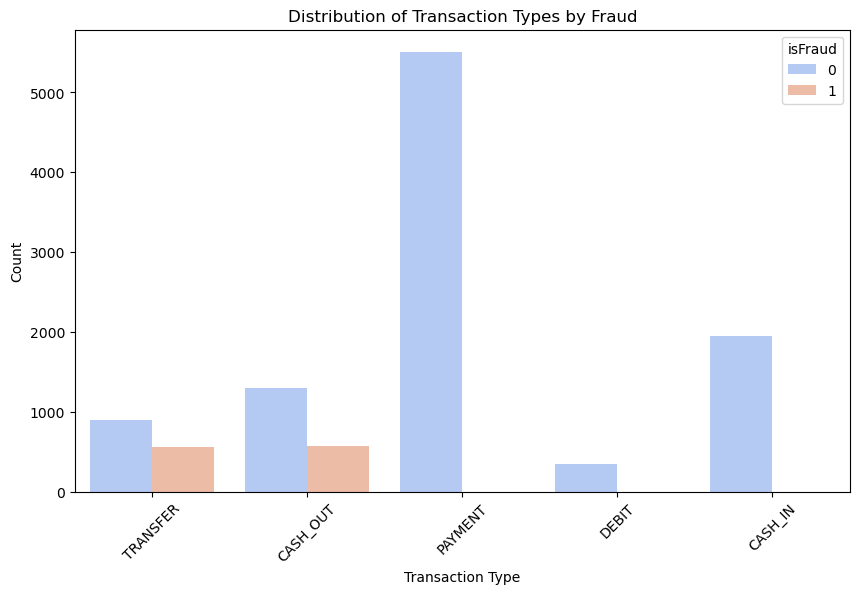

In [16]:
# Visualize the distribution of transaction types with respect to fraud
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud', palette='coolwarm')
plt.title('Distribution of Transaction Types by Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

b.Transaction Origin and Destination Names (nameOrig, nameDest): Since these are unique identifiers, they may not directly show patterns. However, we can explore the top values for these fields.
The first plot shows which accounts are initiating the most transactions, while the second plot shows which accounts are receiving the most. Accounts with unusually high transaction counts could be potential candidates for fraudulent activity

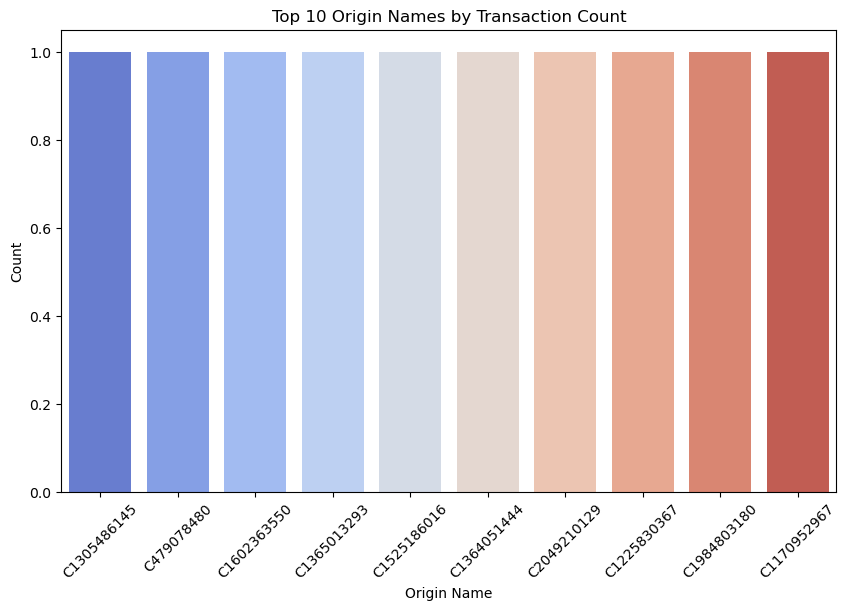

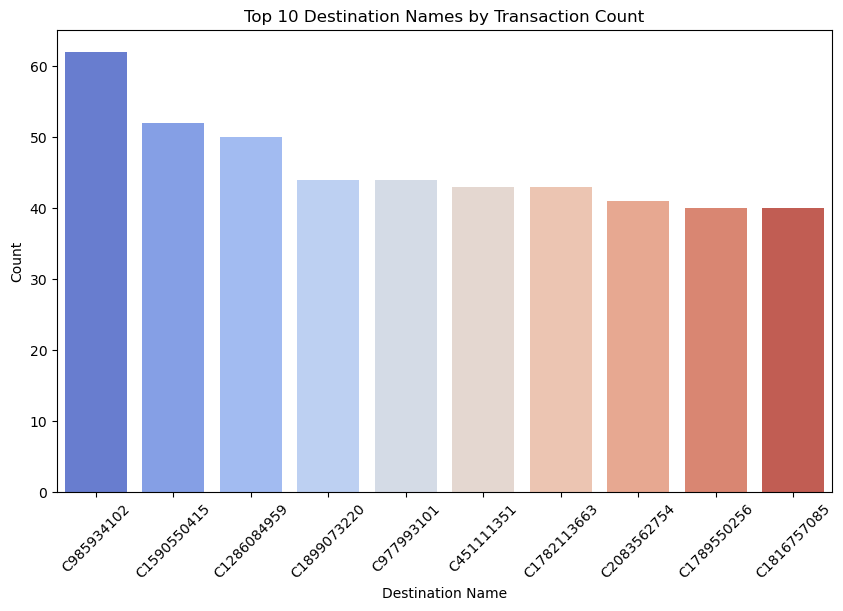

In [19]:
# Top 10 origin names with the highest number of transactions
top_orig = df['nameOrig'].value_counts().head(10)
top_dest = df['nameDest'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_orig.index, y=top_orig.values, palette='coolwarm')
plt.title('Top 10 Origin Names by Transaction Count')
plt.xlabel('Origin Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_dest.index, y=top_dest.values, palette='coolwarm')
plt.title('Top 10 Destination Names by Transaction Count')
plt.xlabel('Destination Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4)Correlation Between Features: Let's check the correlation between numerical features, including amount, balance changes, etc.

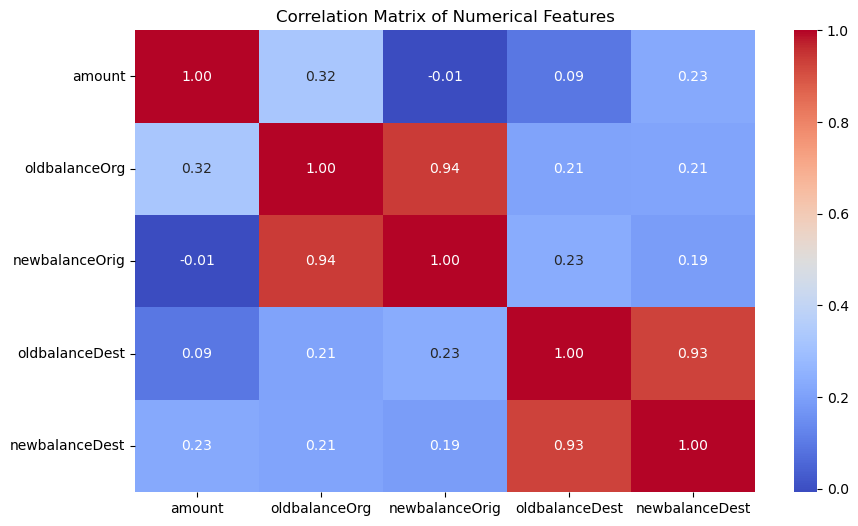

In [21]:
# Correlation matrix for numerical features
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

# Heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

5)Boxplots for Numerical Features: A boxplot can help identify outliers and understand the distribution of numerical features in both fraudulent and non-fraudulent transactions.

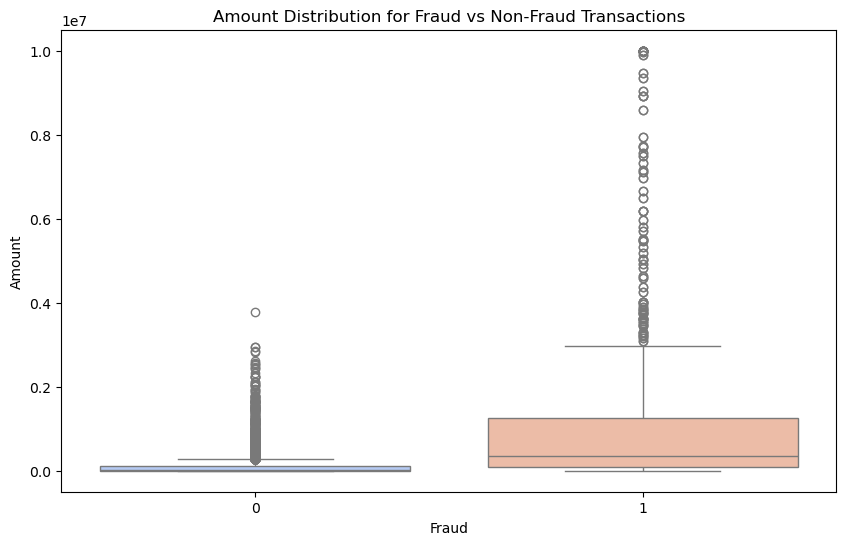

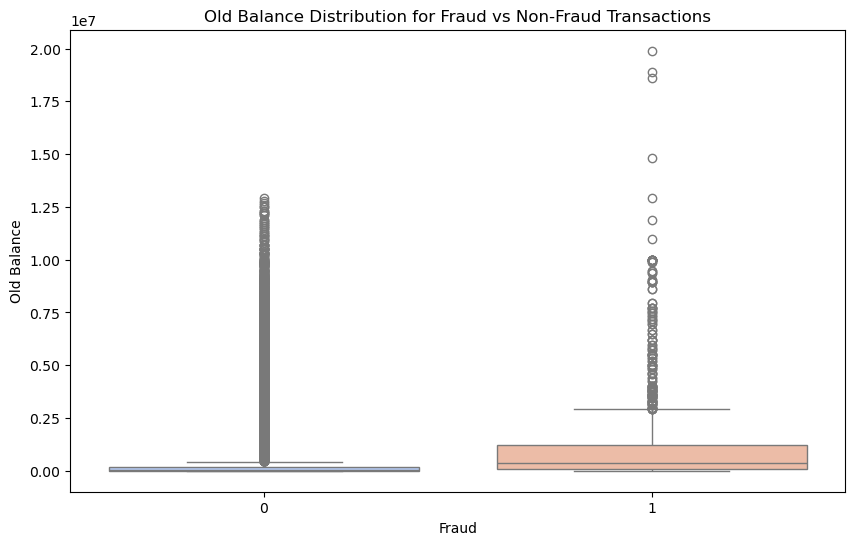

In [23]:
# Boxplot of Amount for Fraud vs Non-Fraud Transactions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='isFraud', y='amount', palette='coolwarm')
plt.title('Amount Distribution for Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()

# Boxplot of Old Balance for Fraud vs Non-Fraud Transactions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='isFraud', y='oldbalanceOrg', palette='coolwarm')
plt.title('Old Balance Distribution for Fraud vs Non-Fraud Transactions')
plt.xlabel('Fraud')
plt.ylabel('Old Balance')
plt.show()

2.Feature Engineering Objective: 
Create new features from existing ones.
Encode categorical variables (type, nameOrig, nameDest). 
Handle imbalance in the dataset (if applicable). 
Steps: Time Features: You already have step, which maps a unit of time (1 hour). 
Amount Scaling: Consider scaling the amount, oldbalanceOrg, and newbalanceOrig to normalize the values. Categorical Encoding:OneHotEncoding for categorical variables (type, nameOrig, nameDest). 
Balance Differences: Create new features such as balance_diff = oldbalanceOrg - newbalanceOrig to measure the balance change.

In [25]:
# OneHotEncoding for categorical features
df_encoded = pd.get_dummies(df, columns=['type', 'nameOrig', 'nameDest'], drop_first=True)

# Feature engineering: Add balance difference
df_encoded['balance_diff'] = df_encoded['oldbalanceOrg'] - df_encoded['newbalanceOrig']

# Feature scaling (for amount and balance columns)
scaler = StandardScaler()
df_encoded[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_diff']] = \
    scaler.fit_transform(df_encoded[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_diff']])

# Show the engineered features
print(df_encoded.head())

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1 -0.280266      -0.431160       -0.394754       -0.341509   
1     1 -0.280266      -0.431160       -0.394754       -0.333366   
2     1 -0.276812      -0.429935       -0.394754       -0.341509   
3     1 -0.276812      -0.429935       -0.394754       -0.331436   
4     1 -0.254021      -0.421852       -0.394754       -0.341509   

   newbalanceDest  isFraud  type_CASH_OUT  type_DEBIT  type_PAYMENT  ...  \
0       -0.369918        1          False       False         False  ...   
1       -0.369918        1           True       False         False  ...   
2       -0.369918        1          False       False         False  ...   
3       -0.369918        1           True       False         False  ...   
4       -0.369918        1          False       False         False  ...   

   nameDest_M997294994  nameDest_M997919131  nameDest_M99808631  \
0                False                False               False   


#Train-Test Split
Splitting the dataset into features and target
Splitting data into training and testing sets
Standardize the features

In [27]:
# Splitting the dataset into features and target
X = df_encoded.drop('isFraud', axis=1)  # Features
y = df_encoded['isFraud']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features (important for many algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data# Splitting the dataset into features and target


In [29]:
print(X_train_scaled.shape, X_test_scaled.shape)

(8913, 18659) (2229, 18659)


In [31]:
print(y.value_counts())

isFraud
0    10000
1     1142
Name: count, dtype: int64


#Model Selection and Training

In [33]:
# Train models
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

#Logistic Regression Model

In [35]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_lr))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1999
           1       0.98      0.25      0.40       230

    accuracy                           0.92      2229
   macro avg       0.95      0.62      0.68      2229
weighted avg       0.93      0.92      0.90      2229

ROC-AUC:  0.6236629184157297


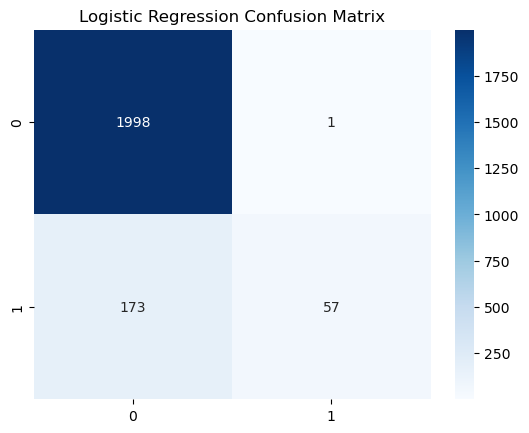

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
#Hyperparameter distribution
#Random Forest Model

In [39]:
# Hyperparameter distribution for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]  # Class weights to handle imbalanced data
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 3-fold cross-validation for faster tuning
randomized_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist, 
                                          n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV model with training data
randomized_search_rf.fit(X_train_scaled, y_train)

# Best Random Forest Model from RandomizedSearchCV
best_rf = randomized_search_rf.best_estimator_

# Predictions using the best model from RandomizedSearchCV
y_pred_rf = best_rf.predict(X_test_scaled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [40]:
# Evaluation using classification report and ROC-AUC
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC: Using predicted probabilities for ROC AUC calculation (for imbalanced classification)
y_pred_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]  # For binary classification
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_prob_rf))

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1999
           1       0.70      0.90      0.79       230

    accuracy                           0.95      2229
   macro avg       0.85      0.93      0.88      2229
weighted avg       0.96      0.95      0.95      2229

ROC-AUC:  0.9871805467951367


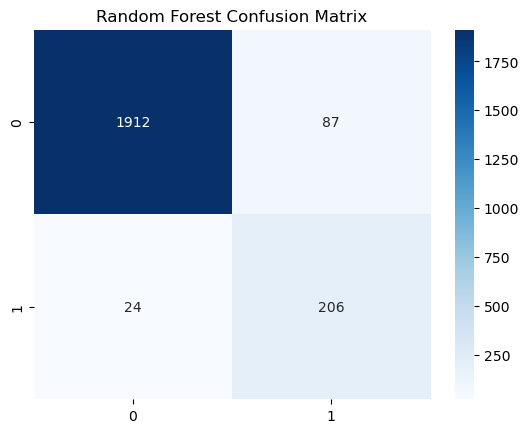

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
#Gradient Boosting Classifier

In [45]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
print("Gradient Boosting Evaluation:")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_gb))

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.93      0.97       230

    accuracy                           0.99      2229
   macro avg       1.00      0.97      0.98      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC:  0.9673913043478262


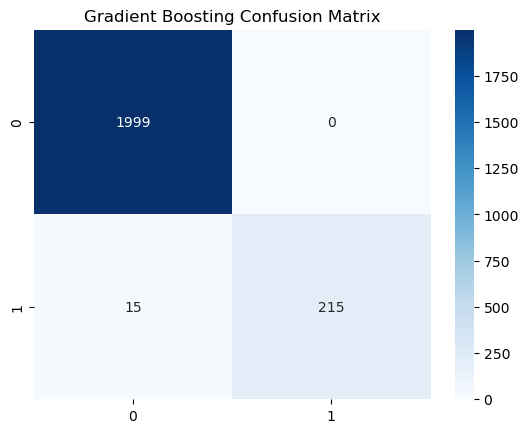

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

In [ ]:
#KNeighbors Classifier

In [49]:
# KNeighbors Classifier
("KNN", KNeighborsClassifier())
KNN_model = RandomForestClassifier()
KNN_model.fit(X_train_scaled, y_train)
y_pred_KNN = KNN_model.predict(X_test_scaled)
print("KNN Evaluation:")
print(classification_report(y_test, y_pred_KNN))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_KNN))

KNN Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.95      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

ROC-AUC:  0.9760869565217392


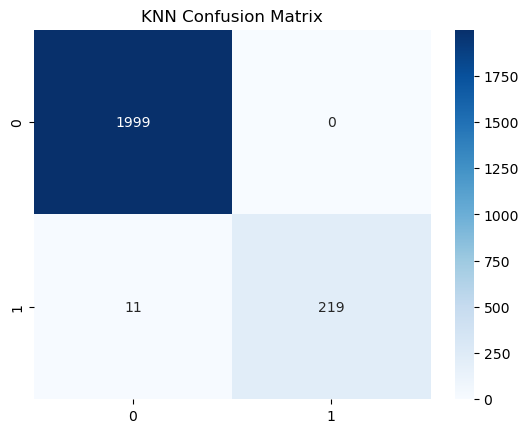

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
#AdaBoost Classifier

In [53]:
# AdaBoost Classifier
("AdaBoost", AdaBoostClassifier())
AdaBoost_model = AdaBoostClassifier()
AdaBoost_model.fit(X_train_scaled, y_train)
y_pred_AdaBoost = AdaBoost_model.predict(X_test_scaled)
print("AdaBoost Evaluation:")
print(classification_report(y_test, y_pred_AdaBoost))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_AdaBoost))

AdaBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.97      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

ROC-AUC:  0.9823585705896427


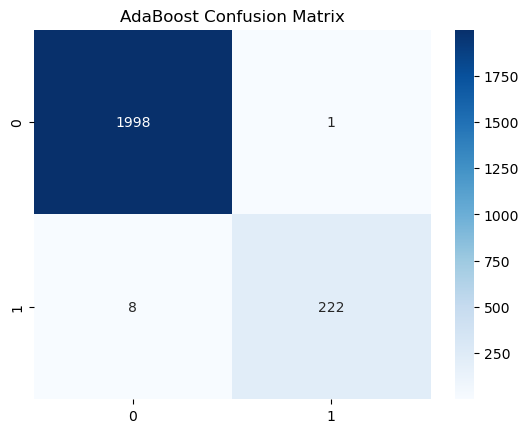

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred_AdaBoost), annot=True, fmt="d", cmap="Blues")
plt.title("AdaBoost Confusion Matrix")
plt.show()

In [ ]:
#XGB Classifier

In [57]:
# XGB Classifier 
("XGBoost", XGBClassifier())
XGB_model = XGBClassifier()
XGB_model.fit(X_train_scaled, y_train)
y_pred_XGBoost = XGB_model.predict(X_test_scaled)
print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred_XGBoost))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred_XGBoost))

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.99      0.97      0.98       230

    accuracy                           1.00      2229
   macro avg       0.99      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

ROC-AUC:  0.9821084455271113


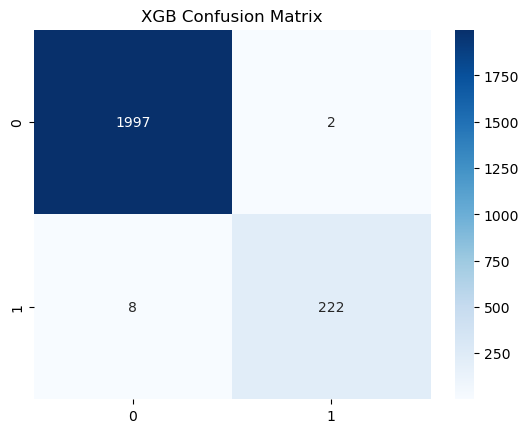

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred_XGBoost), annot=True, fmt="d", cmap="Blues")
plt.title("XGB Confusion Matrix")
plt.show()

#Model evaluation Key Insights of output: 
Top Performers: KNN, AdaBoost, and XGBoost achieved 1.00 accuracy, showcasing excellent performance in fraud detection. 
Precision: The models performed exceptionally well in terms of precision, KNN achieving 1.00 precision. 
Recall: While most models have high recall, Logistic Regression has notably low recall (0.25), indicating it may be missing many fraudulent transactions. 
Accuracy: KNN stands out with 100% accuracy, followed by AdaBoost and XGBoost, each achieving 1.00 accuracy.

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Print model evaluation metrics
def evaluate_model(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  # Added accuracy
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Accuracy: {accuracy}")

# Evaluate all models
print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_lr)

print("\nRandom Forest Evaluation:")
evaluate_model(y_test, y_pred_rf)

print("\nGradient Boosting Evaluation:")
evaluate_model(y_test, y_pred_gb)

print("\nKNN Evaluation:")
evaluate_model(y_test, y_pred_KNN)

print("\nAdaBoost Evaluation:")
evaluate_model(y_test, y_pred_AdaBoost)

print("\nXGBoost Evaluation:")
evaluate_model(y_test, y_pred_XGBoost)

Logistic Regression Evaluation:
Precision: 0.9827586206896551
Recall: 0.24782608695652175
F1-Score: 0.3958333333333333
ROC-AUC: 0.6236629184157297
Accuracy: 0.9219380888290714

Random Forest Evaluation:
Precision: 0.7030716723549488
Recall: 0.8956521739130435
F1-Score: 0.7877629063097514
ROC-AUC: 0.9260652065163016
Accuracy: 0.9502018842530283

Gradient Boosting Evaluation:
Precision: 1.0
Recall: 0.9347826086956522
F1-Score: 0.9662921348314607
ROC-AUC: 0.9673913043478262
Accuracy: 0.9932705248990579

KNN Evaluation:
Precision: 1.0
Recall: 0.9521739130434783
F1-Score: 0.9755011135857461
ROC-AUC: 0.9760869565217392
Accuracy: 0.9950650515926425

AdaBoost Evaluation:
Precision: 0.9955156950672646
Recall: 0.9652173913043478
F1-Score: 0.9801324503311258
ROC-AUC: 0.9823585705896427
Accuracy: 0.9959623149394348

XGBoost Evaluation:
Precision: 0.9910714285714286
Recall: 0.9652173913043478
F1-Score: 0.9779735682819384
ROC-AUC: 0.9821084455271113
Accuracy: 0.9955136832660386


In [63]:
# Financial Impact Assumptions
fraudulent_loss = 10000  # Estimated loss per fraudulent transaction detected
legitimate_loss = 50     # False positive cost per legitimate transaction flagged as fraud

def financial_impact(y_test, y_pred, amounts, fraudulent_loss, legitimate_loss):
    """
    Function to calculate the financial impact of fraud detection model's predictions.

    Parameters:
    y_test (Series): True labels (0 for non-fraud, 1 for fraud)
    y_pred (Series): Predicted labels (0 for non-fraud, 1 for fraud)
    amounts (Series): Transaction amounts for each transaction
    fraudulent_loss (float): Estimated monetary loss per fraudulent transaction detected
    legitimate_loss (float): Monetary loss for false positives (legitimate transactions flagged as fraud)
    """
    # Calculate the number of true positives (fraud correctly detected)
    true_positives = ((y_test == 1) & (y_pred == 1)).sum()
    
    # Calculate the number of false positives (legitimate transactions wrongly flagged as fraud)
    false_positives = ((y_test == 0) & (y_pred == 1)).sum()

    # Calculate the total financial loss due to fraud
    fraud_loss = true_positives * fraudulent_loss
    
    # Calculate the total financial loss due to false positives
    false_positive_loss = false_positives * legitimate_loss

    # Calculate total financial loss
    total_loss = fraud_loss + false_positive_loss
    
    # Print results
    print(f"Total Fraud Loss: ${fraud_loss}")
    print(f"Total Legitimate Loss (False Positive Loss): ${false_positive_loss}")
    print(f"Total Financial Loss: ${total_loss}")

# Apply the financial impact analysis to the models

# Assuming you have predictions from each model (y_pred_lr, y_pred_rf, y_pred_knn, etc.)
print("Financial Impact Analysis for Logistic Regression:")
financial_impact(y_test, y_pred_lr, df_encoded['amount'], fraudulent_loss, legitimate_loss)

print("\nFinancial Impact Analysis for Random Forest:")
financial_impact(y_test, y_pred_rf, df_encoded['amount'], fraudulent_loss, legitimate_loss)

print("\nFinancial Impact Analysis for K-Nearest Neighbors:")
financial_impact(y_test, y_pred_KNN, df_encoded['amount'], fraudulent_loss, legitimate_loss)

print("\nFinancial Impact Analysis for Gradient Boosting:")
financial_impact(y_test, y_pred_gb, df_encoded['amount'], fraudulent_loss, legitimate_loss)

print("\nFinancial Impact Analysis for AdaBoost:")
financial_impact(y_test, y_pred_AdaBoost, df_encoded['amount'], fraudulent_loss, legitimate_loss)

print("\nFinancial Impact Analysis for XGBoost:")
financial_impact(y_test, y_pred_XGBoost, df_encoded['amount'], fraudulent_loss, legitimate_loss)

Financial Impact Analysis for Logistic Regression:
Total Fraud Loss: $570000
Total Legitimate Loss (False Positive Loss): $50
Total Financial Loss: $570050

Financial Impact Analysis for Random Forest:
Total Fraud Loss: $2060000
Total Legitimate Loss (False Positive Loss): $4350
Total Financial Loss: $2064350

Financial Impact Analysis for K-Nearest Neighbors:
Total Fraud Loss: $2190000
Total Legitimate Loss (False Positive Loss): $0
Total Financial Loss: $2190000

Financial Impact Analysis for Gradient Boosting:
Total Fraud Loss: $2150000
Total Legitimate Loss (False Positive Loss): $0
Total Financial Loss: $2150000

Financial Impact Analysis for AdaBoost:
Total Fraud Loss: $2220000
Total Legitimate Loss (False Positive Loss): $50
Total Financial Loss: $2220050

Financial Impact Analysis for XGBoost:
Total Fraud Loss: $2220000
Total Legitimate Loss (False Positive Loss): $100
Total Financial Loss: $2220100


 #KNN, Gradient Boosting, AdaBoost, and XGBoost performed well with no false positives, meaning they didn't misclassify legitimate transactions as fraud.
 #Random Forest and Logistic Regression had some false positives, but their total fraud loss was lower than the others.
 #KNN and Gradient Boosting had the lowest total financial loss, as they minimized false positives.

Length of y_test: 2229
Length of y_pred_lr: 2229
Length of y_pred_rf: 2229
Length of y_pred_gb: 2229
Length of y_pred_KNN: 2229
Length of y_pred_AdaBoost: 2229
Length of y_pred_XGBoost: 2229
All prediction lists are of the same length.
                 Model  Precision  Accuracy   ROC-AUC
0  Logistic Regression   0.982759  0.921938  0.623663
1        Random Forest   0.703072  0.950202  0.926065
2    Gradient Boosting   1.000000  0.993271  0.967391
3                  KNN   1.000000  0.995065  0.976087
4             AdaBoost   0.995516  0.995962  0.982359
5              XGBoost   0.991071  0.995514  0.982108


<Figure size 1200x800 with 0 Axes>

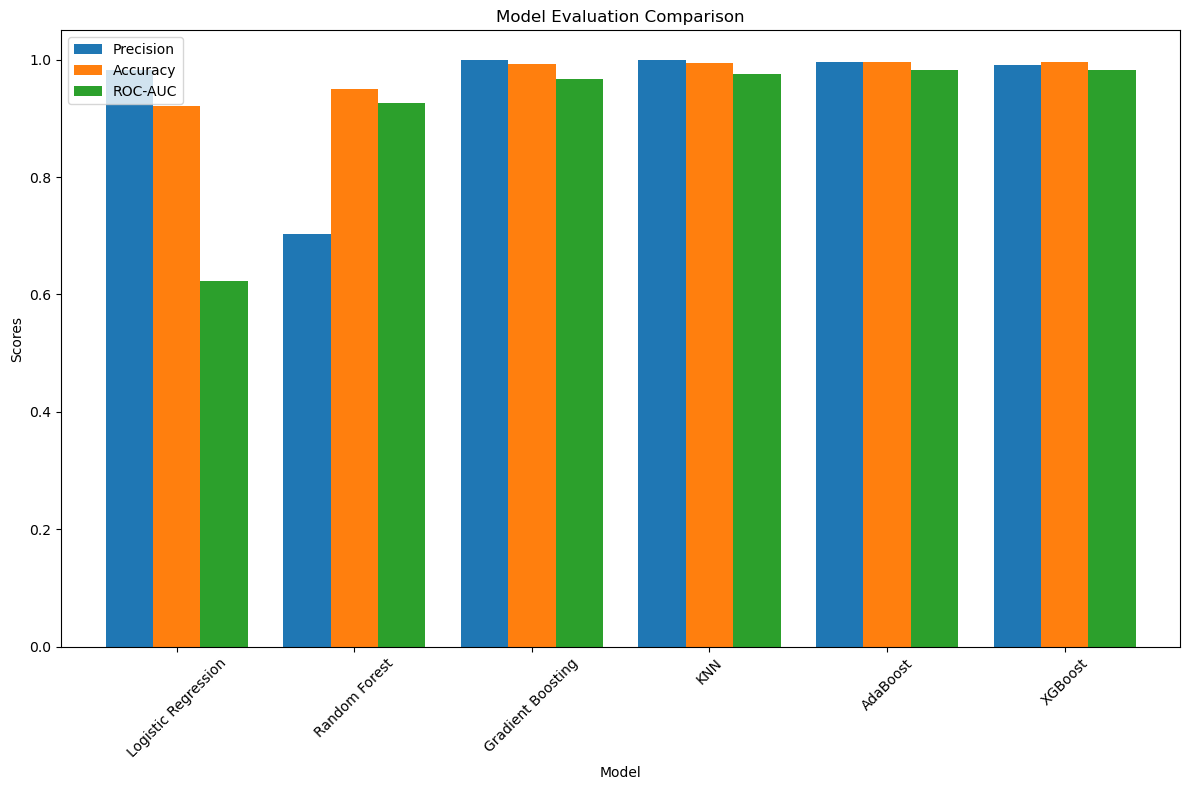

In [65]:
# Ensure all predictions (y_pred_*) have been made and their lengths match y_test

# Ensure all predictions (y_pred_*) have been made and their lengths match y_test
print("Length of y_test:", len(y_test))
print("Length of y_pred_lr:", len(y_pred_lr))
print("Length of y_pred_rf:", len(y_pred_rf))
print("Length of y_pred_gb:", len(y_pred_gb))
print("Length of y_pred_KNN:", len(y_pred_KNN))
print("Length of y_pred_AdaBoost:", len(y_pred_AdaBoost))
print("Length of y_pred_XGBoost:", len(y_pred_XGBoost))

# Ensure all models have the same length of predictions
if (len(y_test) == len(y_pred_lr) == len(y_pred_rf) == len(y_pred_gb) == len(y_pred_KNN) == len(y_pred_AdaBoost) == len(y_pred_XGBoost)):
    print("All prediction lists are of the same length.")
else:
    print("There is a mismatch in the lengths of the prediction lists.")

# Define the metrics dictionary
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN', 'AdaBoost', 'XGBoost'],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_KNN),
        precision_score(y_test, y_pred_AdaBoost),
        precision_score(y_test, y_pred_XGBoost)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_KNN),
        accuracy_score(y_test, y_pred_AdaBoost),
        accuracy_score(y_test, y_pred_XGBoost)
    ],
'ROC-AUC': [
        roc_auc_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred_gb),
        roc_auc_score(y_test, y_pred_KNN),
        roc_auc_score(y_test, y_pred_AdaBoost),
        roc_auc_score(y_test, y_pred_XGBoost)
    ]
}

# Create the DataFrame if the lists have matching lengths
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame to verify
print(metrics_df)

# Plot the metrics for all models
plt.figure(figsize=(12, 8))

# Create a barplot for Precision, Accuracy, and ROC-AUC
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Model Evaluation Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Function to get classification metrics

In [67]:
# Create a function to get classification metrics (precision, recall, F1, accuracy etc.)
def get_classification_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = {
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1': report['1']['f1-score'],
        'accuracy': report['accuracy']
    }
    return metrics

# Collect metrics for each model
lr_metrics = get_classification_metrics(lr_model, X_test_scaled, y_test)
rf_metrics = get_classification_metrics(best_rf, X_test_scaled, y_test)
gb_metrics = get_classification_metrics(gb_model, X_test_scaled, y_test)
knn_metrics = get_classification_metrics(KNN_model, X_test_scaled, y_test)
ada_metrics = get_classification_metrics(AdaBoost_model, X_test_scaled, y_test)
xgb_metrics = get_classification_metrics(XGB_model, X_test_scaled, y_test)

#Creating DataFrames for each model's metrics

In [69]:
# Create DataFrames for each model's metrics
lr_df = pd.DataFrame([lr_metrics], index=['Logistic Regression'])
rf_df = pd.DataFrame([rf_metrics], index=['Random Forest'])
gb_df = pd.DataFrame([gb_metrics], index=['Gradient Boosting'])
knn_df = pd.DataFrame([knn_metrics], index=['KNN'])
ada_df = pd.DataFrame([ada_metrics], index=['AdaBoost'])
xgb_df = pd.DataFrame([xgb_metrics], index=['XGBoost'])

# Concatenate all the dataframes
all_evaluations = pd.concat([lr_df, rf_df, gb_df, knn_df, ada_df, xgb_df])

# Display the sorted results
# Sort by 'precision_1' first and then by 'accuracy' in descending order
results = all_evaluations.sort_values(by=['precision_1', 'accuracy'], ascending=[False, False]).round(2)

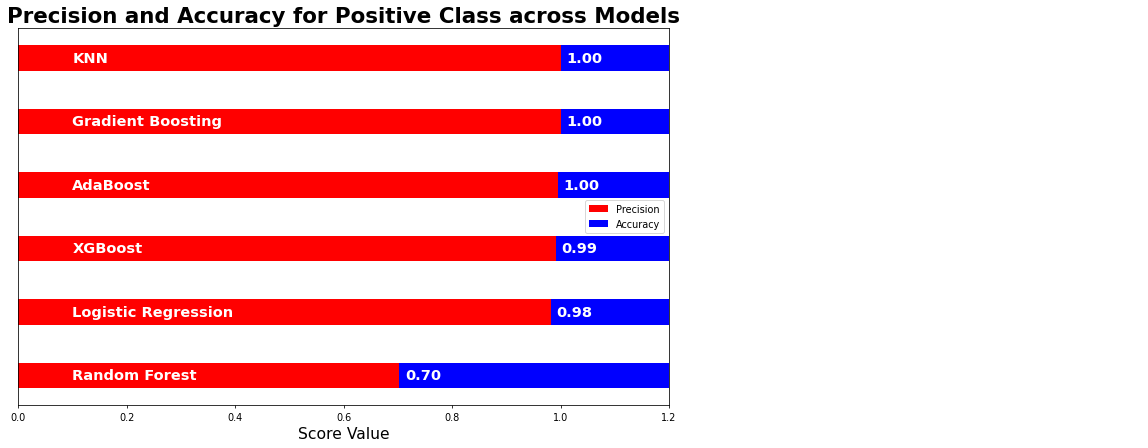

In [71]:
# Sort values based on 'precision_1'
all_evaluations.sort_values(by='precision_1', ascending=True, inplace=True)

# Extract the precision_1 and accuracy scores
precision_1_scores = all_evaluations['precision_1']
accuracy_scores = all_evaluations['accuracy']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)

# Create bars for precision and accuracy
ax.barh(all_evaluations.index, precision_1_scores, color='red', label='Precision', height=0.4)
ax.barh(all_evaluations.index, accuracy_scores, color='blue', label='Accuracy', height=0.4, left=precision_1_scores)

# Annotate the values and indexes
for i, (precision, accuracy, name) in enumerate(zip(precision_1_scores, accuracy_scores, all_evaluations.index)):
    # For precision text (red bars), use white color for better contrast
    ax.text(precision + 0.01, i, f"{precision:.2f}", ha='left', va='center', fontweight='bold', color='white', fontsize=15)
    
    # For accuracy text (blue bars), shift text to the right of precision bars
    ax.text(precision + accuracy + 0.01, i, f"{accuracy:.2f}", ha='left', va='center', fontweight='bold', color='white', fontsize=15)
    
    # For model names, use white text to contrast against both red and blue bars
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=15)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and labels
plt.title("Precision and Accuracy for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Score Value', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Summary:
Best Models: KNN and Gradient Boosting are the top performers with perfect precision and accuracy, ensuring accurate fraud detection without missing much.
Strong but Slightly Less Accurate: XGBoost and AdaBoost are very strong as well, with 99% precision and accuracy, but make a tiny mistake in detecting fraud.
Needs Improvement: Logistic Regression and Random Forest have lower precision, meaning they misclassify fraud or legitimate transactions more often. Random Forest has higher overall accuracy but struggles more with precision.